In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("boston_assign_1.csv")

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
data.shape #optional

(506, 14)

In [5]:
data.isnull().sum()  

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
PRICE       0
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data.describe()  #optional

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
data.info()  #optional

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    float64
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    int64  
 9   TAX      394 non-null    int64  
 10  PTRATIO  394 non-null    float64
 11  B        394 non-null    float64
 12  LSTAT    394 non-null    float64
 13  PRICE    394 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 46.2 KB


<AxesSubplot:xlabel='PRICE', ylabel='Count'>

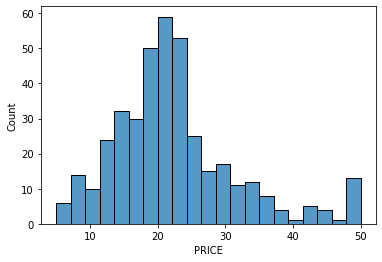

In [9]:
import seaborn as sns
sns.histplot(data.PRICE)

In [10]:
correlation = data.corr()
correlation.loc['PRICE']

CRIM      -0.397230
ZN         0.406822
INDUS     -0.510829
CHAS       0.173701
NOX       -0.459054
RM         0.723951
AGE       -0.407470
DIS        0.279547
RAD       -0.416638
TAX       -0.508864
PTRATIO   -0.543809
B          0.347256
LSTAT     -0.743450
PRICE      1.000000
Name: PRICE, dtype: float64

<AxesSubplot:>

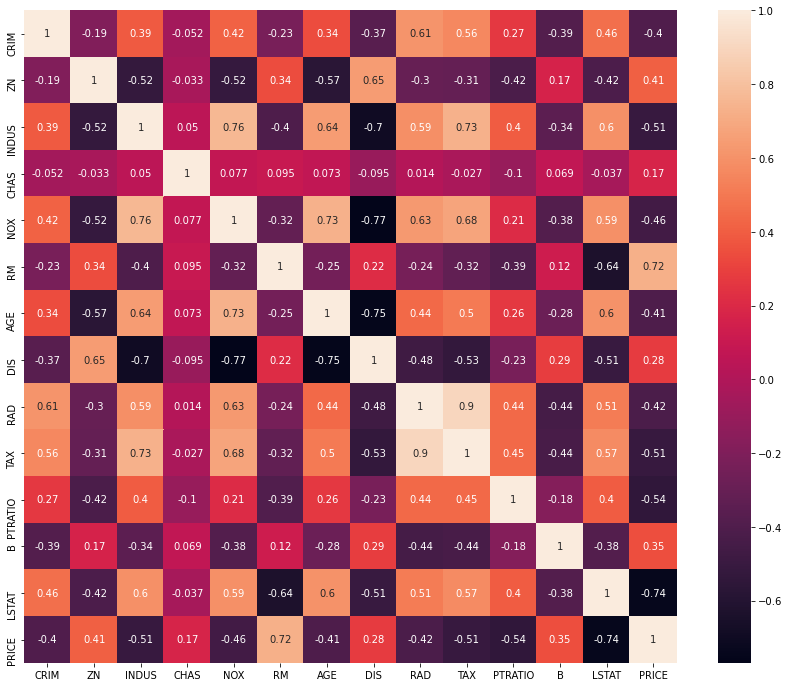

In [11]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(figsize=(15,12))
sns.heatmap(correlation,square = True,annot = True)

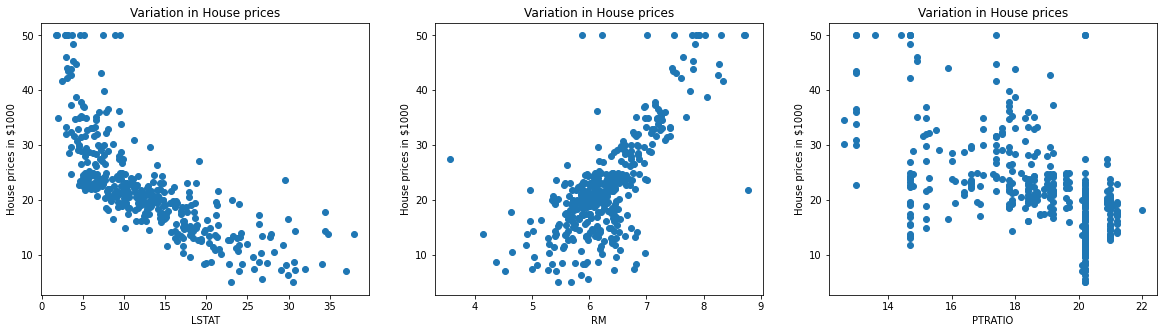

In [12]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM', 'PTRATIO']
for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = data[col]
    y = data.PRICE
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('House prices in $1000')
    
plt.show()


In [13]:
X = data.iloc[:,:-1]
y= data.PRICE

In [14]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std



In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
regressor = LinearRegression()

In [17]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
y_pred = regressor.predict(X_test)

In [19]:
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)

5.608390826694485


In [20]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2) #accuracy without deep learning

0.6270849941673193


In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
import tensorflow as tf
from keras.layers import Dense, Activation,Dropout
from keras.models import Sequential

model = Sequential()
model.add(Dense(128,activation = 'relu',input_dim =13))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(16,activation = 'relu'))
model.add(Dense(1))

In [23]:
model.compile(optimizer = 'adam',loss ='mean_squared_error',metrics=['mae'])

In [24]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.05)

Epoch 1/100
10/10 [==============================] - 2s 57ms/step - loss: 540.0624 - mae: 21.3610 - val_loss: 413.1541 - val_mae: 19.7401
Epoch 2/100
10/10 [==============================] - 0s 10ms/step - loss: 482.7337 - mae: 19.9767 - val_loss: 344.0527 - val_mae: 17.9627
Epoch 3/100
10/10 [==============================] - 0s 9ms/step - loss: 374.4032 - mae: 17.1933 - val_loss: 225.6652 - val_mae: 14.3965
Epoch 4/100
10/10 [==============================] - 0s 10ms/step - loss: 211.9434 - mae: 12.2519 - val_loss: 81.7735 - val_mae: 7.8339
Epoch 5/100
10/10 [==============================] - 0s 10ms/step - loss: 87.1385 - mae: 7.4204 - val_loss: 49.4023 - val_mae: 5.9782
Epoch 6/100
10/10 [==============================] - 0s 9ms/step - loss: 63.8323 - mae: 6.2407 - val_loss: 37.4534 - val_mae: 4.9765
Epoch 7/100
10/10 [==============================] - 0s 11ms/step - loss: 35.4178 - mae: 4.5495 - val_loss: 28.4096 - val_mae: 3.9003
Epoch 8/100
10/10 [==============================]

10/10 [==============================] - 0s 11ms/step - loss: 5.3260 - mae: 1.6842 - val_loss: 4.8405 - val_mae: 1.6991
Epoch 63/100
10/10 [==============================] - 0s 11ms/step - loss: 5.1349 - mae: 1.6944 - val_loss: 4.0944 - val_mae: 1.4746
Epoch 64/100
10/10 [==============================] - 0s 10ms/step - loss: 5.2395 - mae: 1.6686 - val_loss: 4.9951 - val_mae: 1.7453
Epoch 65/100
10/10 [==============================] - 0s 9ms/step - loss: 4.7783 - mae: 1.6243 - val_loss: 3.9856 - val_mae: 1.4835
Epoch 66/100
10/10 [==============================] - 0s 11ms/step - loss: 4.9495 - mae: 1.6380 - val_loss: 4.4882 - val_mae: 1.6355
Epoch 67/100
10/10 [==============================] - 0s 10ms/step - loss: 4.6962 - mae: 1.6150 - val_loss: 3.6383 - val_mae: 1.4042
Epoch 68/100
10/10 [==============================] - 0s 11ms/step - loss: 4.6144 - mae: 1.5867 - val_loss: 4.0029 - val_mae: 1.5066
Epoch 69/100
10/10 [==============================] - 0s 9ms/step - loss: 4.5848 - 

In [25]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [26]:
y_pred = model.predict(X_test)
mse_nn, mae_nn = model.evaluate(X_test, y_test)
print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

3/3 [==============================] - 0s 4ms/step - loss: 19.5254 - mae: 2.5042
Mean squared error on test data:  19.525367736816406
Mean absolute error on test data:  2.504230499267578


In [27]:
from sklearn.metrics import mean_absolute_error
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error on test data: ', mse_lr)
print('Mean absolute error on test data: ', mae_lr)

Mean squared error on test data:  31.454047664950842
Mean absolute error on test data:  3.367983225154239


In [28]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2) #accuracy with deep learning

0.7685098588107884


In [29]:
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse) #optional

4.418751621269845


In [30]:
#giving an input
import sklearn
new_data = sklearn.preprocessing.StandardScaler().fit_transform(([[0.1, 10.0,
5.0, 0, 0.4, 6.0, 50, 6.0, 1, 400, 20, 300, 10]]))
prediction = model.predict(new_data)
print("Predicted house price:", prediction) 

1/1 [==============================] - 0s 48ms/step
Predicted house price: [[9.319595]]
